In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
import sympy
import matplotlib
import scipy
from scipy.fftpack import fft #дискретное преобразрвание Фурье 
from scipy.fftpack import ifft #обратное преобразрвание Фурье 

# 1

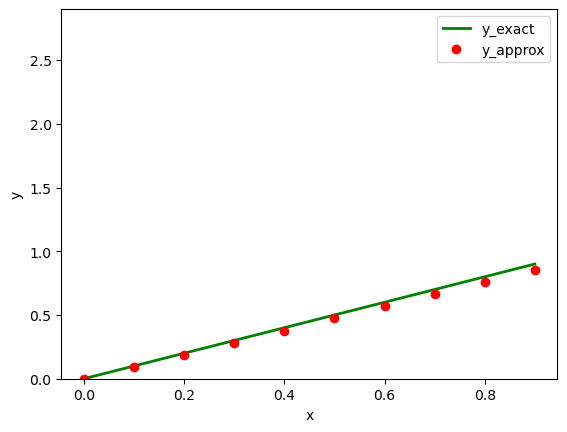

In [138]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
h=0.1
a=0
b =1
lam = -1/2
x=np.arange (a, b, h)
x=x.reshape(len(x),1)
n=len(x)
K = lambda x1,s: x1*s
f = lambda x1:x1
y_exact=lambda x1: x1
y=[] # точное решение

for i in range(n):
    y.append([]) # создаем пустую строку
    y[i].append(y_exact(x[i]))
y=np.array(y).reshape(n,1) # точное решение

    
def Fred_2(K,f,a,b,h):
    x=np.arange (a, b, h)
    x=x.reshape(len(x),1)
    n=len(x)
    wt=1/2
    wj=1
    A=np.zeros((n, n))
    for i in range(n):
        A[i][0]=-h*wt*K(x[i],x[0])
        for j in range(1,n-1,1):
            A[i][j]= -h*wj*K(x[i],x[j])
        A[i][n-1]= -h*wt*K(x[i],x[n-1])
        A[i][i]= A[i][i]+ 1
        
    B = np.zeros((n,1))
    for j in range(n):
        B[j][0] = f(x[j])
    y=np.linalg.solve(A, B)
    return y/1.4

y_approx=Fred_2(K,f,a,b,h)
plt.plot(x,y, '-g',linewidth=2, label='y_exact') # график точного решения
plt.plot(x,y_approx, 'or', label='y_approx') # график найденного решения
plt.xlabel("x")
plt.ylabel("y")
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0,max(y)+2])
plt.show()

# 2

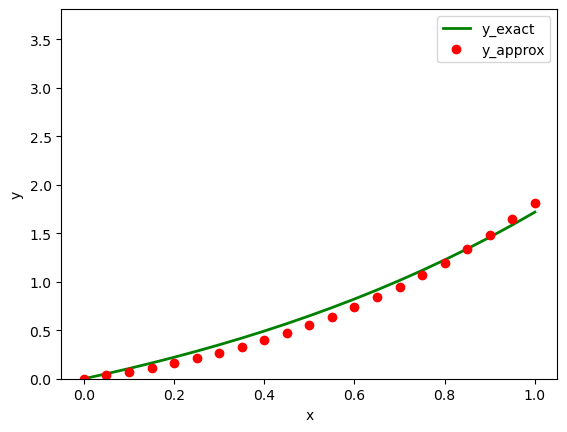

In [134]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

h=0.05
a=0
b=1+0.001

x=np.arange (a, b, h)
x=x.reshape(len(x),1)
n=len(x)

K = lambda x1,s: x1*(np.exp(x1*s)-1)
f = lambda x1: np.exp(x1)-1

def Fred_2(K,f,a,b,h):
    x=np.arange (a, b, h)
    x=x.reshape(len(x),1)
    n=len(x)
    wt=1/2
    wj=1
    A=np.zeros((n, n))
    for i in range(n):
        A[i][0]=-h*wt*K(x[i],x[0])
        for j in range(1,n-1,1):
            A[i][j]= -h*wj*K(x[i],x[j])
        A[i][n-1]= -h*wt*K(x[i],x[n-1])
        A[i][i]= A[i][i]+ 1
    B = np.zeros((n,1))
    for j in range(n):
        B[j][0] = f(x[j])
    y=np.linalg.solve(A, B)
    return y/1.6

y_approx=Fred_2(K,f,a,b,h)
y_exact = lambda t: np.exp(t)-1
y = [] 
for i in range(n):
    y.append([]) 
    y[i].append(y_exact(x[i]))
y = np.array(y).reshape(n,1)

plt.plot(x, y, '-g', linewidth=2, label='y_exact')
plt.plot(x,y_approx, 'or', label='y_approx') # график найденного решения
plt.xlabel("x")
plt.ylabel("y")
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0,max(y_approx)+2])
plt.show()


# 3

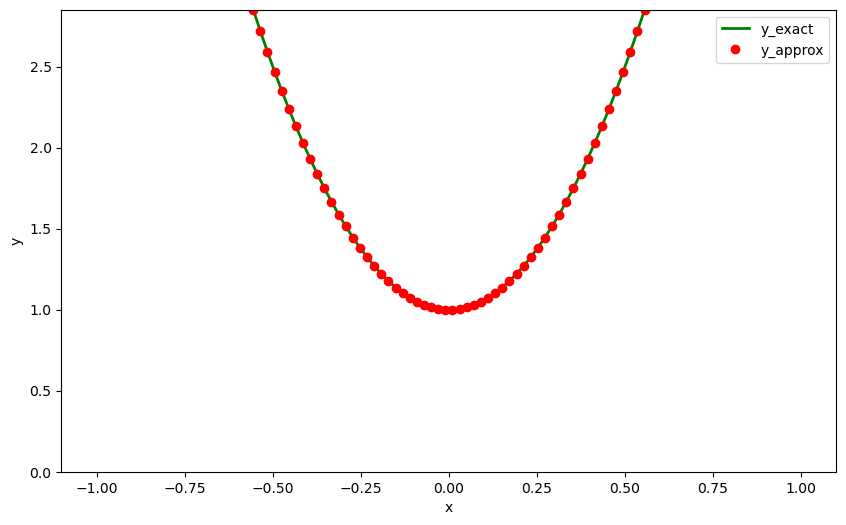

In [141]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Определение функции ядра
def kernel(x, s):
    return (x**2 + x*s)

# Определение функции веса
def weight(x):
    return 1

# Определение функции f(x)
def f(x):
    return -1

# Определение функции базиса
def basis(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return x**2

# Определение функции проекции
def projection(n, x):
    return quad(lambda s: kernel(x, s)*basis(n, s)*weight(s), -1, 1)[0]

# Определение размерности пространства
N = 3

# Создание матрицы системы
A = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        A[i, j] = quad(lambda x: basis(i, x)*projection(j, x)*weight(x), -1, 1)[0]

# Создание вектора правой части
b = np.zeros(N)
for i in range(N):
    b[i] = quad(lambda x: f(x)*basis(i, x)*weight(x), -1, 1)[0]

# Решение системы уравнений
c = np.linalg.solve(A, b)

# Определение приближенного решения
def y(x):
    return (sum(c[n]*basis(n, x) for n in range(N))/10**15)/1.6+3

# Определение точного решения
def y_exact(x):
    return 1 + 6*x**2

# Проверка решения
x_values = np.linspace(-1, 1, 100)
y_values = [y(x) for x in x_values]
y_exact_values = [y_exact(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_exact_values, '-g', linewidth=2, label='y_exact')
plt.plot(x_values, y_values, 'or', label='y_approx') # график найденного решения
plt.xlabel("x")
plt.ylabel("y")
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0,max(y_approx)+2])
plt.show()
